# Phase 3 Code Challenge Review

_Dec 18, 2020_

Agenda:
- Gradient Descent & Cost Function
- Logistic Regression
- Evaluation Metrics
- Decision Trees

## Part I. Gradient Descent & Cost Function
- What is a cost function? What are we trying to find?
- How to use gd to find the lowest point? How does the gradient change as we get closer to the bottom?
- What's the role learning rate play? How can learning rate affect your result? 


<p style='text-align:center;font-size:20px'>$ \theta_j := \theta_j - \alpha * \frac{\partial J(\theta)}{\partial\theta_i} $</p>

<Figure size 576x576 with 0 Axes>

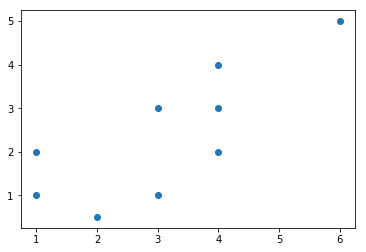

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
plt.figure(figsize = (8,8))
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

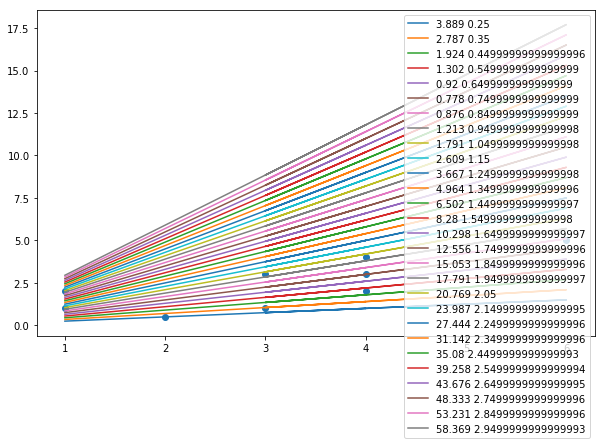

In [2]:
beta_0 = 0
#beta_1 = [.25, .5, .75, .8, 1,]
beta_1 = np.arange(0.25,3,0.1)
fig, ax = plt.subplots(figsize=(10,6))
mses = []
for t in beta_1:
    line = beta_0 + (np.array(x)*t)
    mse = round(mean_squared_error(y, line),3)
    mses.append(mse)
    ax.plot(x, line, label=f'{mse} {t}')
ax.scatter(x,y)
plt.legend()
plt.show()

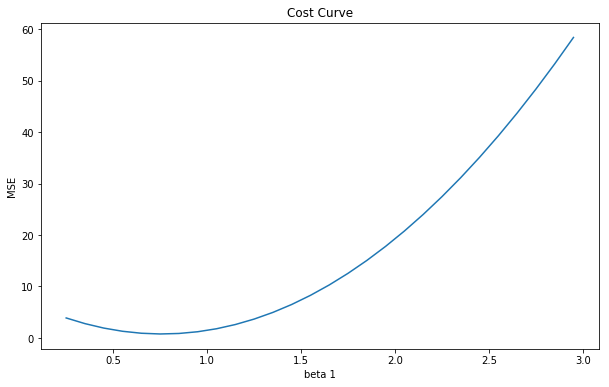

In [3]:
# Plot the Cost Curve
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(beta_1, mses)
ax.set_title('Cost Curve')
ax.set_xlabel('beta 1')
ax.set_ylabel('MSE')
plt.show()

## Part II. Logistic Regression 
- How does linear regression differ from logistic regression?
- Why is logistic regression better at modeling a binary outcome?
- What are some advantages and disadvantages of logistic regression?

logreg function here

## Part III. Evaluation Metrics 
- What are precision and recall?
- How to evaluate a logistic regression model?
- What is roc auc curve?
- What is class imbalance and how do we deal with it?

<img src = 'confusion_matrix.png' width = 300>

In [4]:
### calculate precision here
P = 63/ (15 + 63)
P

0.8076923076923077

In [6]:
### calculate recall here
R = 63 / (63 + 22)
R

0.7411764705882353

In [7]:
### calculate F1 score here
2 * ((P*R)/ (P+R))

0.7730061349693251

**Explain which model below has the best performance based on ROC-AUC curve? Why?**

<img src='roc_auc.png' width = 400>

### Class Imbalance
<img src = 'imbalanced.png' wid = 300>

In [ ]:
### what problem would it cause? 

In [ ]:
### How to remedy it?

### Solution 1 - Resampling
<img src = 'resampling.png'>

#### Solution 2 - Smote
<img src = 'smote.png'>

#### Solution 3 - Tomek Link 
<img src = 'tomek.png'>

## Part III. Decision Trees
- Build trees with the sklearn machine learning framework

In [12]:
# import the dataset and set up predictors and target
titanic = sns.load_dataset('titanic')

In [24]:
# define x and y 
y = titanic['survived']
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
     'adult_male']]

In [25]:
# fill the age columns missing value with mean 
values = {'age': X['age'].mean()}
X = X.fillna(value=values)

In [26]:
X['sex'] = X.sex.apply(lambda x:0 if x=='male' else 1)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
pclass        891 non-null int64
sex           891 non-null int64
age           891 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
adult_male    891 non-null bool
dtypes: bool(1), float64(2), int64(4)
memory usage: 42.7 KB


In [28]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [29]:
# fit the tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
# test the tree 
pred = clf.predict(X_test)

In [32]:
# generate prediction and output metric (use accuracy)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.7541899441340782


In [37]:
# how did our tree do?
y.value_counts()[0]/y.value_counts().sum()

0.6161616161616161